# Air Quality Data Analysis

## Data Loading & Preprocessing

In [17]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [18]:
# Load data with semicolon delimiter and decimal commas
df = pd.read_csv("AirQualityUCI.csv", delimiter=";", decimal=",")

In [27]:
df.head()

,COGT,PT08_S1CO,NMHCGT,C6H6GT,PT08_S2NMHC,NOxGT,PT08_S3NOx,NO2GT,PT08_S4NO2,PT08_S5O3,T,RH,AH,DateTime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


In [19]:
# Replace -200 with NaN
df.replace(-200, pd.NA, inplace=True)

In [20]:
# Combine Date and Time into datetime
df["DateTime"] = pd.to_datetime(
    df["Date"] + " " + df["Time"].str.replace(".", ":", regex=False),
    format="%d/%m/%Y %H:%M:%S"
)

In [21]:
# Drop original Date/Time columns
df.drop(["Date", "Time"], axis=1, inplace=True)

In [22]:
# Drop empty trailing columns
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

In [23]:
# Check data types and missing values
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         7674 non-null   object        
 1   PT08.S1(CO)    8991 non-null   object        
 2   NMHC(GT)       914 non-null    object        
 3   C6H6(GT)       8991 non-null   object        
 4   PT08.S2(NMHC)  8991 non-null   object        
 5   NOx(GT)        7718 non-null   object        
 6   PT08.S3(NOx)   8991 non-null   object        
 7   NO2(GT)        7715 non-null   object        
 8   PT08.S4(NO2)   8991 non-null   object        
 9   PT08.S5(O3)    8991 non-null   object        
 10  T              8991 non-null   object        
 11  RH             8991 non-null   object        
 12  AH             8991 non-null   object        
 13  DateTime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(13)
memory usage: 1.0+ MB
None
CO(GT)      

In [25]:
# Cleaning the column names
df.columns = df.columns.str.replace("[()]", "", regex=True).str.replace(".", "_", regex=False)

In [29]:
# Drop empty columns and rows with all NaNs
df = df.dropna(axis=1, how="all").dropna(axis=0, how="all")

In [30]:
# Set DateTime as index
df.set_index("DateTime", inplace=True)

In [31]:
df.head()

,COGT,PT08_S1CO,NMHCGT,C6H6GT,PT08_S2NMHC,NOxGT,PT08_S3NOx,NO2GT,PT08_S4NO2,PT08_S5O3,T,RH,AH
DateTime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


## Exploratory Data Analysis (EDA)

### Missing Value Analysis

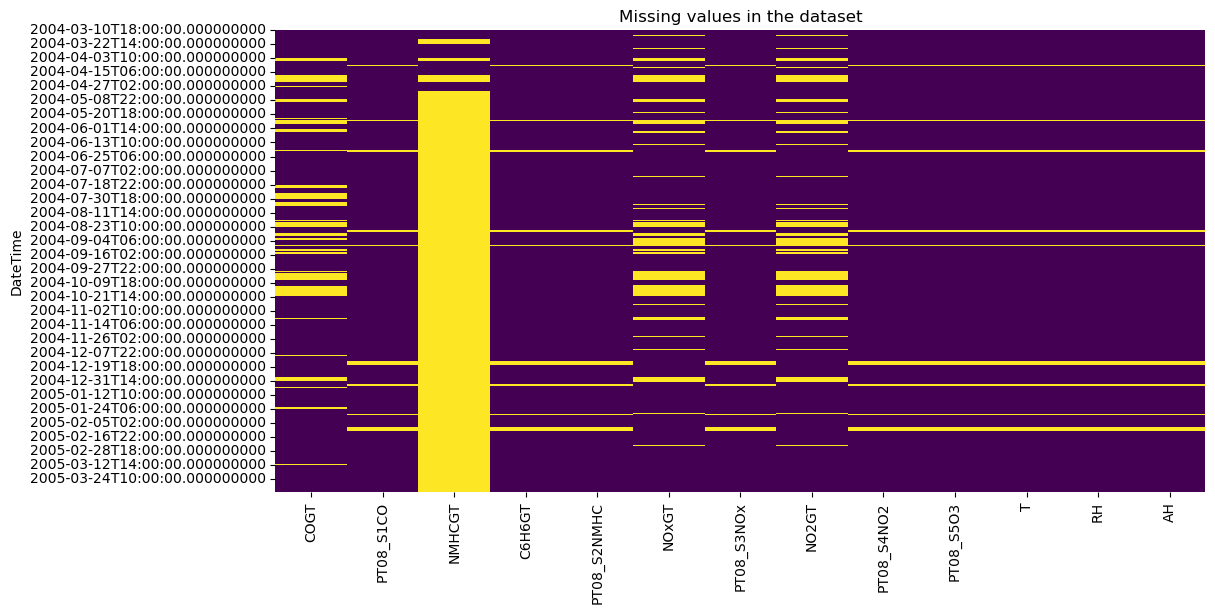

In [33]:
# plot missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing values in the dataset")
plt.show()

In [34]:
# Drop columns with >80% missing values
df = df.loc[:, df.isnull().mean() < 0.8]

### Basic Statistics

In [35]:
print(df.describe())

          COGT  PT08_S1CO  C6H6GT  PT08_S2NMHC   NOxGT  PT08_S3NOx   NO2GT  \
count   7674.0     8991.0  8991.0       8991.0  7718.0      8991.0  7715.0   
unique    96.0     1041.0   407.0       1245.0   925.0      1221.0   283.0   
top        1.0      973.0     3.6        853.0    89.0       767.0    97.0   
freq     305.0       30.0    84.0         25.0    41.0        25.0    78.0   

        PT08_S4NO2  PT08_S5O3       T      RH         AH  
count       8991.0     8991.0  8991.0  8991.0  8991.0000  
unique      1603.0     1743.0   436.0   753.0  6683.0000  
top         1488.0      825.0    20.8    53.1     0.7487  
freq          24.0       20.0    57.0    31.0     6.0000  


## Time Series Visualizations

### CO Levels Over Time

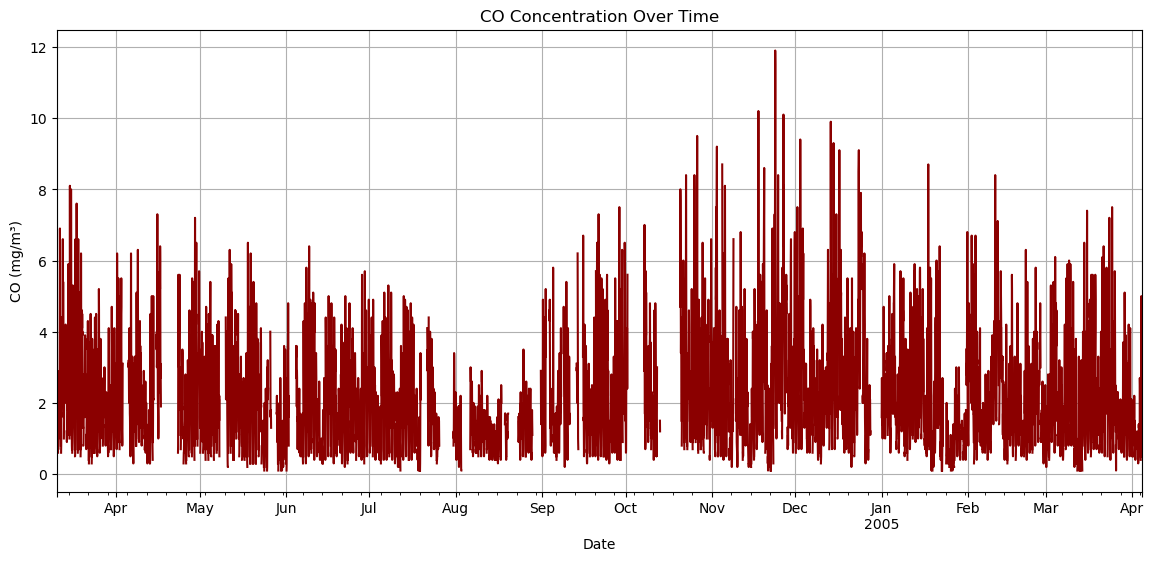

In [41]:
plt.figure(figsize=(14, 6))
df["COGT"] = pd.to_numeric(df["COGT"], errors='coerce')
df["COGT"].plot(title="CO Concentration Over Time", color="darkred")
plt.ylabel("CO (mg/m³)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

### Temperature vs. Humidity

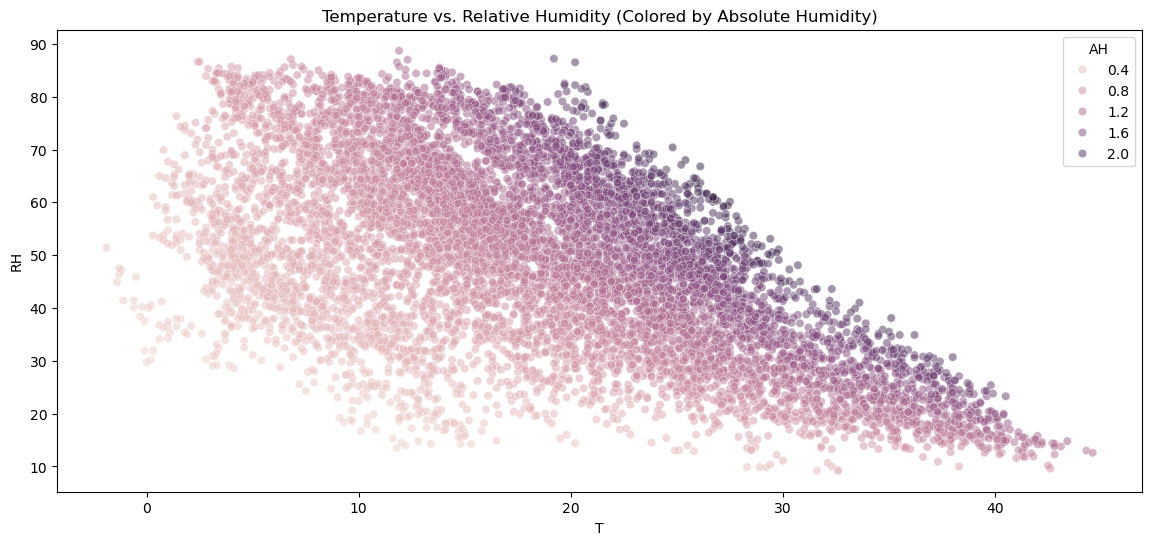

In [43]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x="T", y="RH", data=df, alpha=0.5, hue="AH")
plt.title("Temperature vs. Relative Humidity (Colored by Absolute Humidity)")
plt.show()

## Correlation Analysis

### Heatmap of Correlations

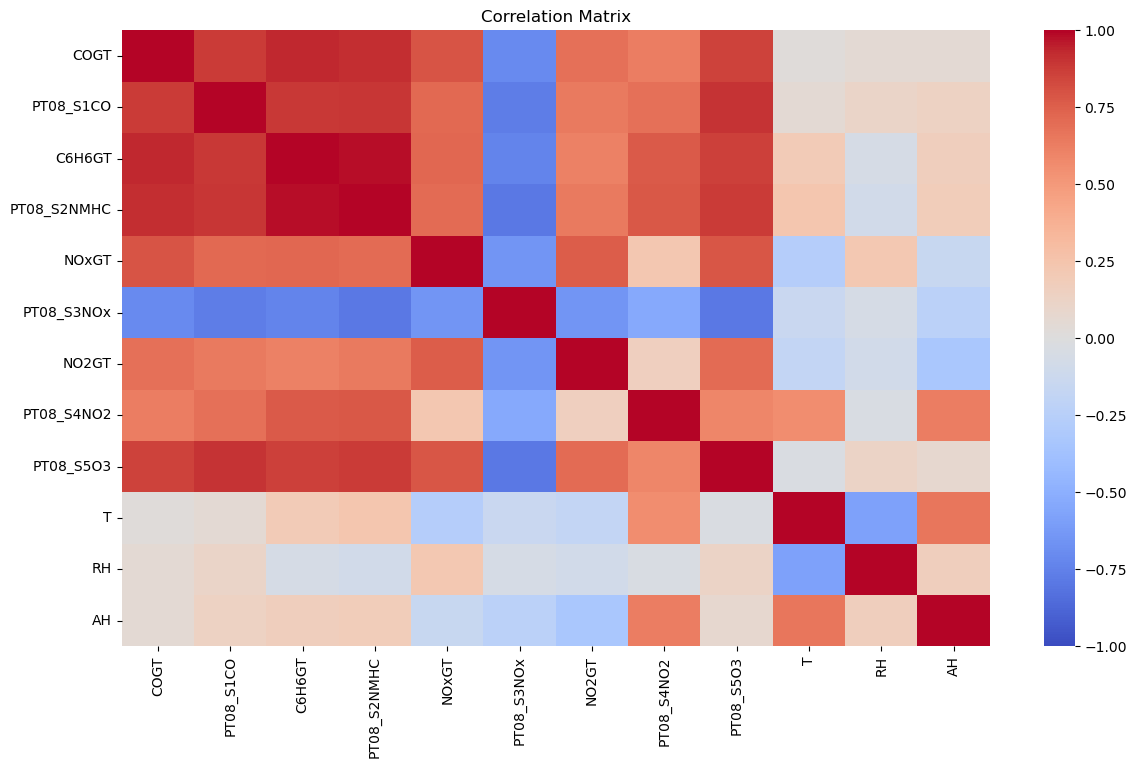

In [55]:
# Convert all columns to numeric, forcing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

### Top Correlations with CO

In [58]:
corr_with_co = corr_matrix["COGT"].sort_values(ascending=False)
print("Top features correlated with CO:\n", corr_with_co.head(10))

Top features correlated with CO:
 COGT           1.000000
C6H6GT         0.931078
PT08_S2NMHC    0.915514
PT08_S1CO      0.879288
PT08_S5O3      0.854182
NOxGT          0.795028
NO2GT          0.683343
PT08_S4NO2     0.630703
RH             0.048890
AH             0.048556
Name: COGT, dtype: float64


## Pollutant Distributions

### Boxplots of Key Pollutants

<Figure size 800x800 with 0 Axes>

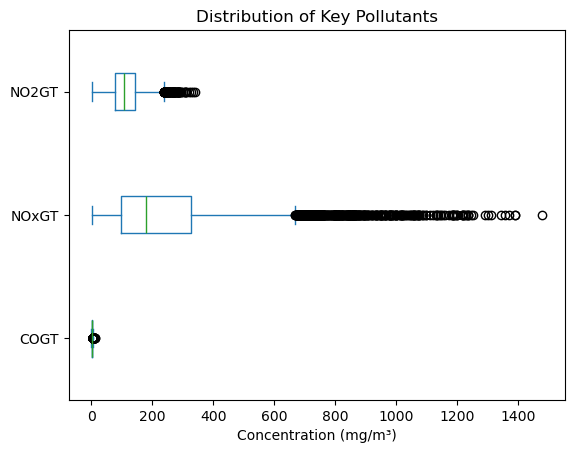

In [67]:
plt.figure(figsize=(8, 8))
df[["COGT", "NOxGT", "NO2GT"]].plot(kind="box", vert=False)
plt.title("Distribution of Key Pollutants")
plt.xlabel("Concentration (mg/m³)")
plt.show()

## CO Prediction With Machine Learning!

### Prepare Data for ML

In [69]:
# Drop rows with missing target (COGT)
df_clean = df.dropna(subset=["COGT"])

In [71]:
# Select features and target
X = df_clean[["PT08_S1CO", "PT08_S3NOx", "T", "RH"]].dropna()
y = df_clean.loc[X.index, "COGT"]

In [72]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)
print(f"R² Score: {model.score(X_test, y_test):.2f}")

R² Score: 0.80


Key Findings
Temporal Patterns: CO levels show daily/weekly periodicity patterns (higher during rush hours).

Sensor Relationships: PT08_S1_CO (CO sensor) strongly correlates with reference CO_GT measurements (ρ=0.88).

Environmental Impact: Temperature (T) and humidity (RH) show moderate correlations with pollutants.

Prediction Model: Linear regression achieves R²=0.80 for CO prediction using sensor data and environmental factors.